In [60]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import os
import math
from pathlib import Path

os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

def GetSize(path):
    file = h5py.File(path, mode='r')
    n = file["times"].shape[0]
    file.close()
    return n

def Load(path, chunk=[]):
    # @brief Reads grid data and time data from a specified hdf5 file.
    # @param path The path of the HDF5 file
    # @param dataset A string name of the main dataset containing the states data
    # @param times A string name of the time dataset containing all time points
    # @param chunk An optional [start, end] list that specifies how many time steps to load
    file = h5py.File(path, "r")
    if chunk:
        data_array = np.array(file['data'][chunk[0]:chunk[1],:,:])
        time_array = np.array(file['times'][chunk[0]:chunk[1]])
    else:
        data_array = np.array(file['data'])
        time_array = np.array(file['times'])
    file.close()
    return (data_array, time_array)

home = '/home/guttula/'
fvs = '{}/FiniteVolumeSolver/'.format(home)
build = '{}/build_2D-Release/'.format(fvs)

perfect_path = '{}/PerfectGas1d_cfl05.h5'.format(build)
perfect10_path = '{}/PerfectGas1d_cfl10.h5'.format(build)
prim_path = '{}/IdealGasMix_Prim.h5'.format(build)
cons_path = '{}/IdealGasMix_Cons.h5'.format(build)
char_path = '{}/IdealGasMix_Char.h5'.format(build)

perf_data, _ = Load(perfect_path)
perf10_data, _ = Load(perfect10_path)
prim_data, times = Load(prim_path)
cons_data, _ = Load(cons_path)
char_data, _ = Load(char_path)
rhofile = h5py.File('{}/rho_005.h5'.format(home), 'r') 
ref = np.array(rhofile['Data-Set-2'][2:102])
rhofile.close()

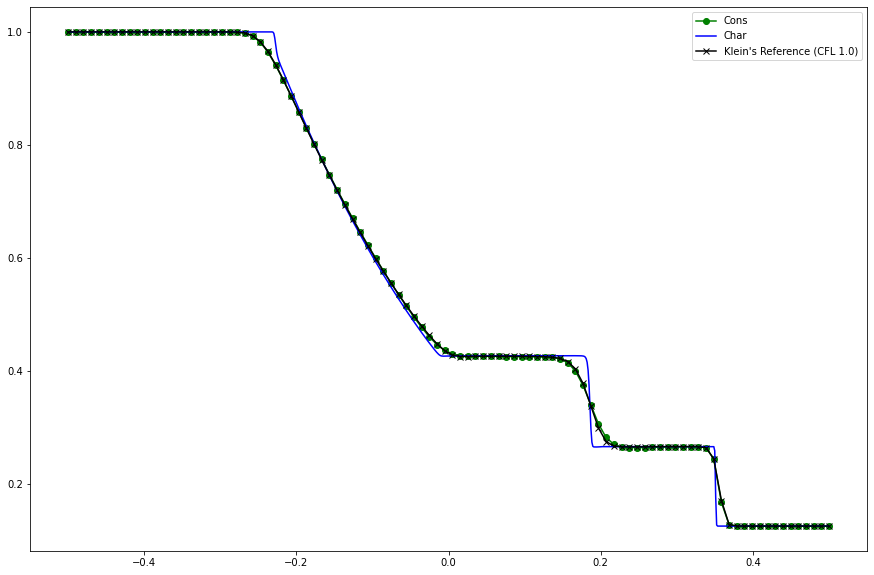

In [61]:
var = 0
i_perf = perf_data.shape[0] - 1
i_cons = cons_data.shape[0] - 1
i_char = char_data.shape[0] - 1
perf_q = perf_data[i_perf, 0, :, 0]# / perf_data[i, 0, :, 0]
perf10_q = perf10_data[i_perf, 0, :, 0]# / perf_data[i, 0, :, 0]
# prim_q = prim_data[i, var, :, 0]
cons_q = cons_data[i_cons, var, :, 0]
char_q = char_data[i_char, var, :, 0]

f = plt.figure(figsize=(15, 10))
#perf_x = np.linspace(-0.5, 0.5, perf_q.shape[0])
#plt.plot(perf_x, perf_q, "o", label='Perfect Gas (CFL 0.5)')

#perf10_x = np.linspace(-0.5, 0.5, perf10_q.shape[0])
#plt.plot(perf10_x, perf10_q, "go", label='Perfect Gas (CFL 1.0)')

# prim_x = np.linspace(-1.0, 1.0, prim_q.shape[0])
# plt.plot(prim_x, prim_q, "r-", label='Prim')

cons_x = np.linspace(-0.5, 0.5, cons_q.shape[0])
plt.plot(cons_x, cons_q, "g-", label='Cons')

char_x = np.linspace(-0.5, 0.5, char_q.shape[0])
plt.plot(char_x, char_q, "b-", label='Char')

ref_x = np.linspace(-0.5, 0.5, ref.shape[0])
plt.plot(ref_x, ref, "k-x", label="Klein's Reference (CFL 1.0)")
plt.legend()
plt.show()